In [1]:
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset('tips')

## Review data in the dataset

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### How many weekdays are present in the dataset?

In [4]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [7]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### Look at the last 5 rows

In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### How many dinners and lunches data is present in the dataset?

In [6]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<Axes: >

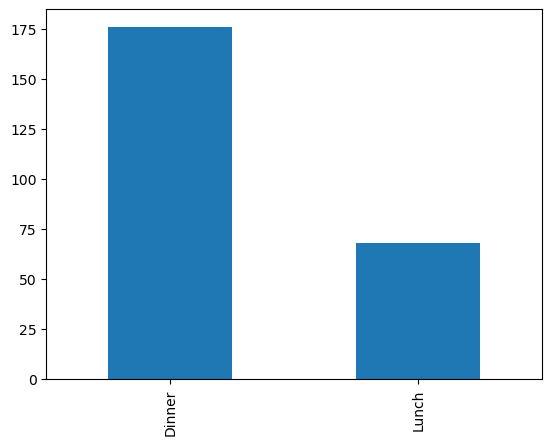

In [8]:
tips.time.value_counts().plot(kind="bar")

### What is the proportion of the dinner and lunches in percentage (%)

In [9]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

### When does people pay more tips i.e. during lunch or dinner?

In [10]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

### Let's plot these values

<Axes: xlabel='time'>

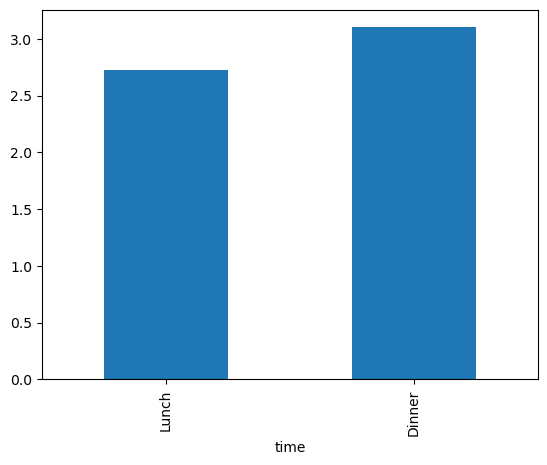

In [11]:
tips.groupby(['time'])['tip'].mean().plot.bar()

### Average tips based on smoker/non-smoker

<Axes: xlabel='smoker'>

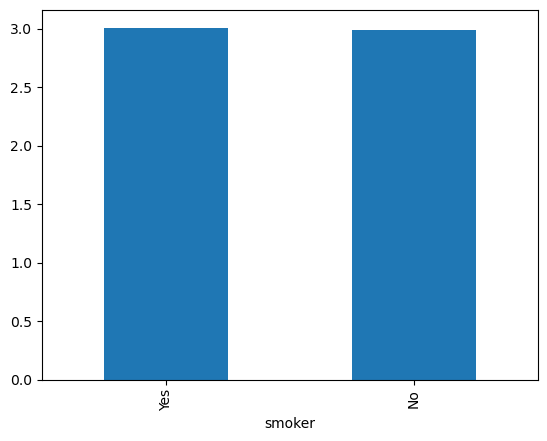

In [12]:
tips.groupby(['smoker'])['tip'].mean().plot.bar()

### Average tips based on sex

<Axes: xlabel='sex'>

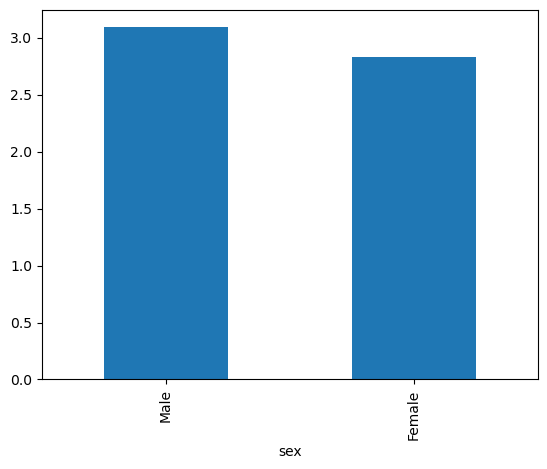

In [13]:
tips.groupby(['sex'])['tip'].mean().plot.bar()

### Average tips based on day

<Axes: xlabel='day'>

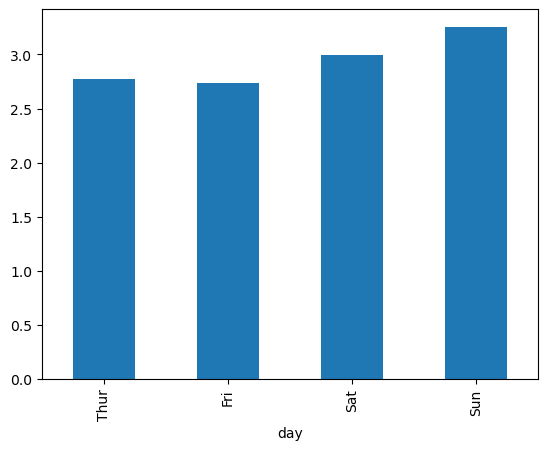

In [14]:
tips.groupby(['day'])['tip'].mean().plot.bar()

### Average tips based on size

<Axes: xlabel='size'>

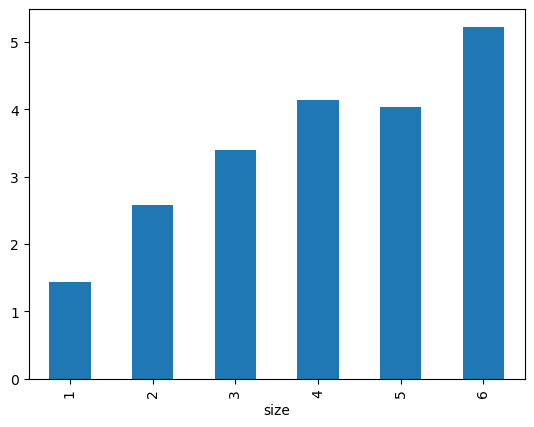

In [15]:
tips.groupby(['size'])['tip'].mean().plot.bar()

### Let's create a cross table for smokers and sex for average tips

In [16]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [17]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


### Let's create a cross table for smokers and day for average tips

In [18]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


### New column to find the percentage of tip compared to the total bill

In [19]:
tips['tip_pct'] = tips.tip / tips.total_bill

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Average tips percentage against sex

<Axes: xlabel='sex'>

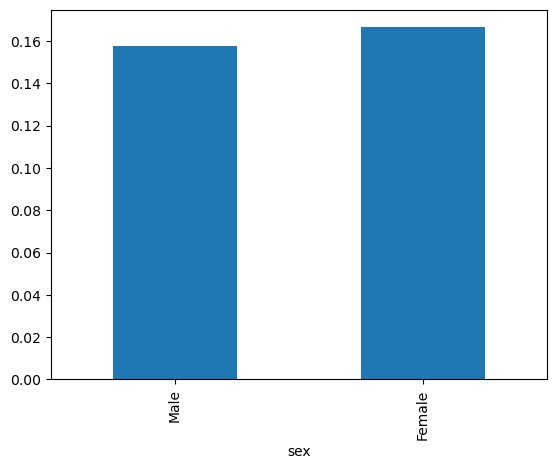

In [23]:
tips.groupby(['sex'])['tip_pct'].mean().plot(kind = "bar")

### Visualize the relationship between total bill and tips

<Axes: xlabel='total_bill', ylabel='tip'>

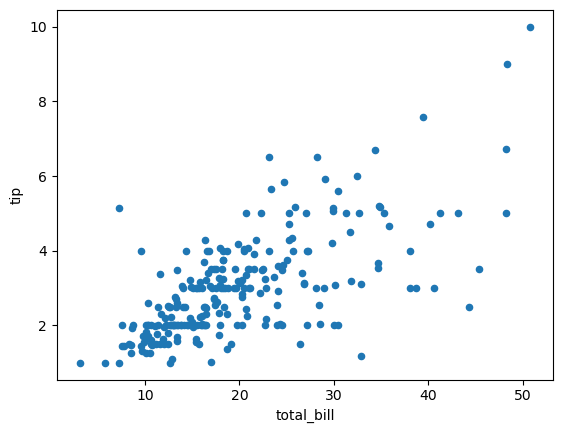

In [26]:
tips.plot.scatter(x='total_bill', y = 'tip')

<Axes: xlabel='total_bill', ylabel='tip'>

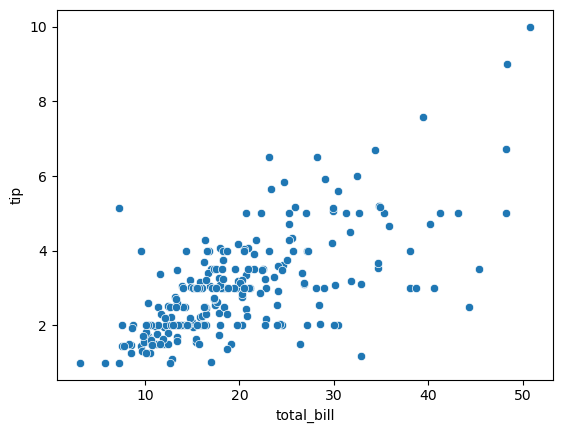

In [27]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

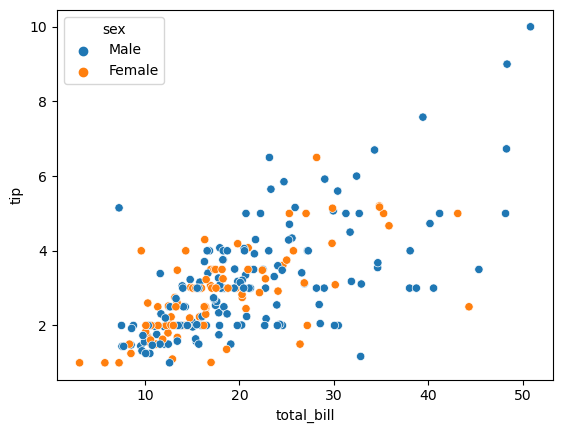

In [28]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue = 'sex')

### Creating the bifurcation of time on the above chart based on column sex

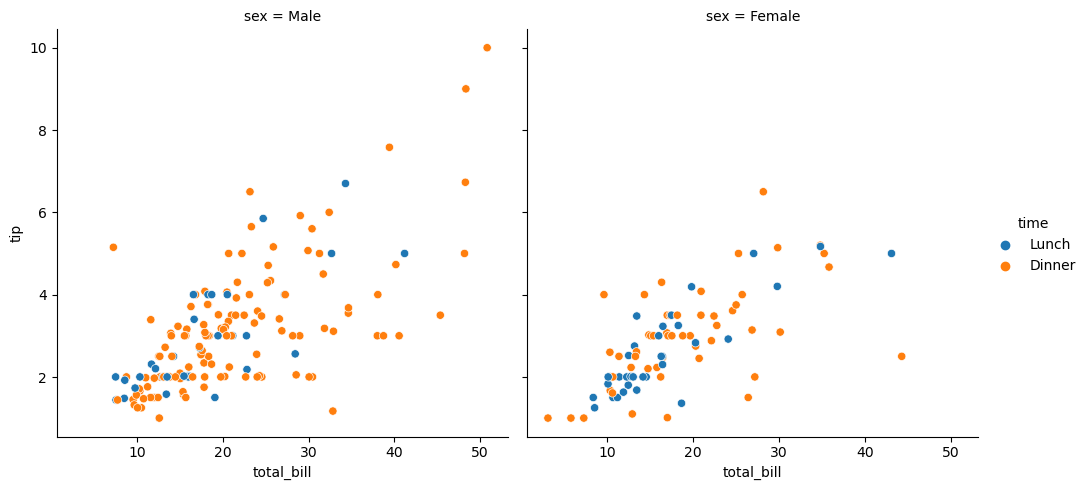

In [31]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='time', col = 'sex')

### Let's look at the distribution of total bill by time

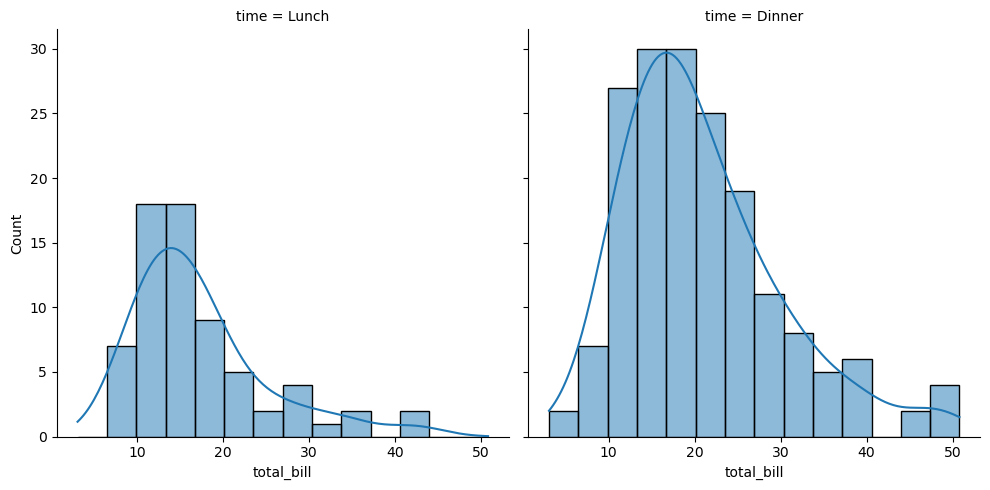

In [32]:
sns.displot(data=tips, x='total_bill', col = 'time', kde=True)

# Observation

#### People are paying more for their dinner than lunch

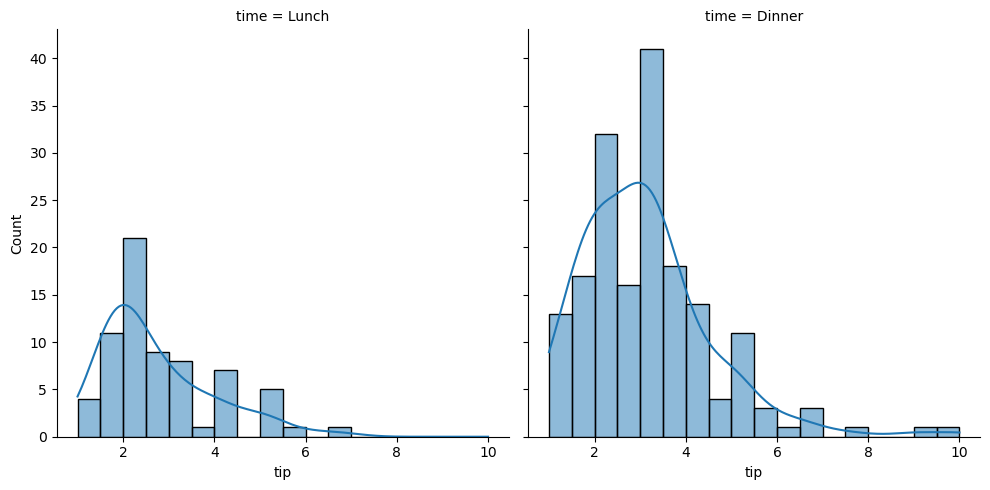

In [33]:
sns.displot(data=tips, x='tip', col = 'time', kde=True)

### Creating correlation and distribution for all the numeric variables by sex

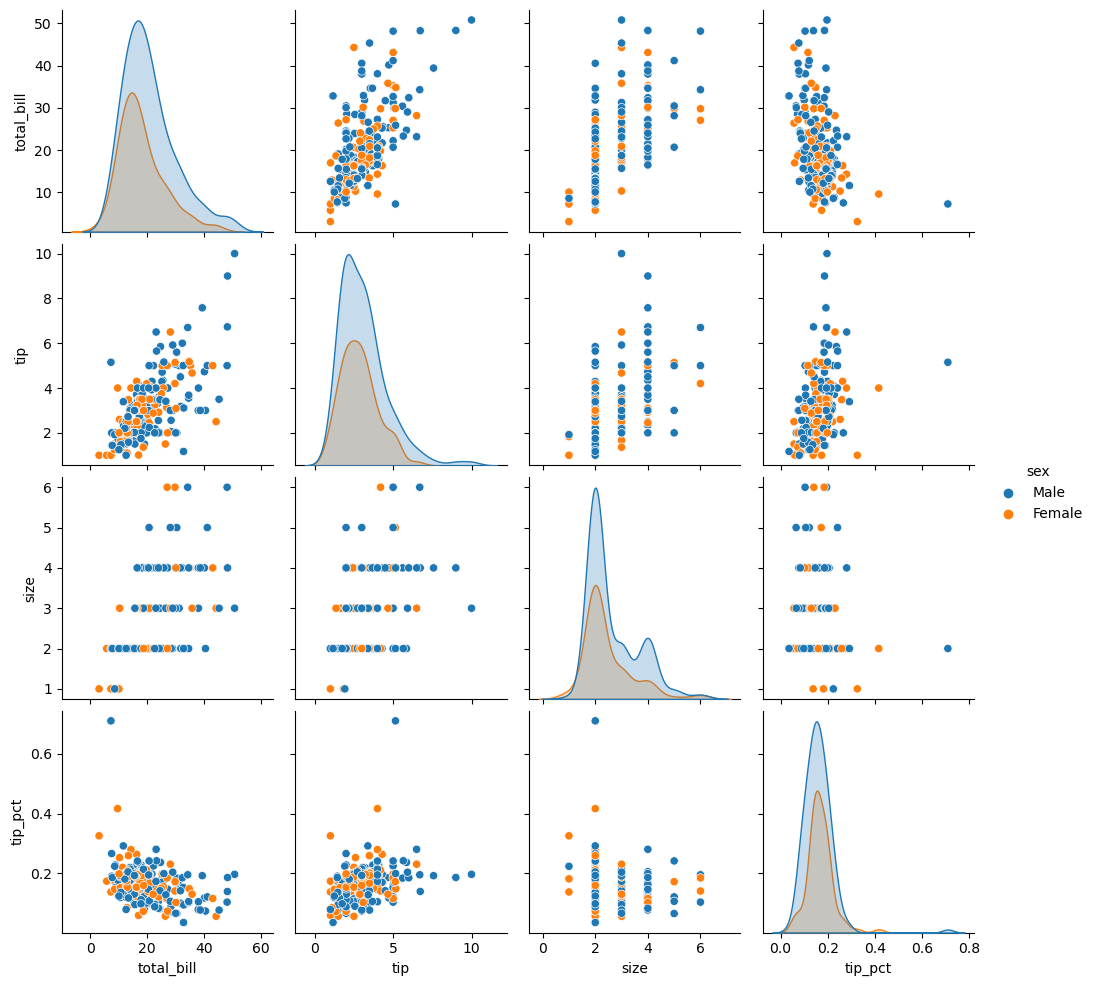

In [34]:
sns.pairplot(data=tips, hue = 'sex')